**Exploratory Data Analysis**

Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("dataset/data.csv")

Feature Extraction

In [12]:
df.columns = ["Sno", "timeStamp", "CAN", "noOfData", "dataPoints", "Flag"]

In [13]:
print(df['noOfData'].value_counts())

8    334978
5     13634
2      2660
Name: noOfData, dtype: int64


In [14]:
df = df.drop('Sno', axis=1)

In [15]:
df.head()

,timeStamp,CAN,noOfData,dataPoints,Flag
0,1.513926e+09,043F,8,00 40 60 FF 65 B4 08 00,R
1,1.513926e+09,018F,8,FE 62 00 00 00 3C 00 00,R
2,1.513926e+09,0260,8,1B 24 24 30 FF 8F 6D 3A,R
3,1.513926e+09,02A0,8,64 00 83 1D 16 05 E3 00,R
4,1.513926e+09,0316,8,45 24 9C 09 24 26 00 76,R


Target Extraction

In [16]:
ratio_of_flag = df['Flag'].value_counts(normalize=True)
print(ratio_of_flag)

R    0.786672
T    0.213328
Name: Flag, dtype: float64


In [17]:
df[['Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Data8']] = df['dataPoints'].str.split(' ', expand=True, n=7)

In [18]:
df.head()

,timeStamp,CAN,noOfData,dataPoints,Flag,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,1.513926e+09,043F,8,00 40 60 FF 65 B4 08 00,R,00,40,60,FF,65,B4,08,00
1,1.513926e+09,018F,8,FE 62 00 00 00 3C 00 00,R,FE,62,00,00,00,3C,00,00
2,1.513926e+09,0260,8,1B 24 24 30 FF 8F 6D 3A,R,1B,24,24,30,FF,8F,6D,3A
3,1.513926e+09,02A0,8,64 00 83 1D 16 05 E3 00,R,64,00,83,1D,16,05,E3,00
4,1.513926e+09,0316,8,45 24 9C 09 24 26 00 76,R,45,24,9C,09,24,26,00,76


In [19]:
col = df.pop('Flag')
df.pop('dataPoints')
df.insert(len(df.columns), 'Flag', col)
df.head(6)

,timeStamp,CAN,noOfData,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Flag
0,1.513926e+09,043F,8,00,40,60,FF,65,B4,08,00,R
1,1.513926e+09,018F,8,FE,62,00,00,00,3C,00,00,R
2,1.513926e+09,0260,8,1B,24,24,30,FF,8F,6D,3A,R
3,1.513926e+09,02A0,8,64,00,83,1D,16,05,E3,00,R
4,1.513926e+09,0316,8,45,24,9C,09,24,26,00,76,R
5,1.513926e+09,0329,8,87,B3,7E,14,11,20,00,14,R


In [20]:
df['noOfData'] = df['noOfData'].apply(lambda x: str(x))
print(df['noOfData'].dtype)

object


Contigency Table b/w Flag and DIC (No of Datapoints)

In [21]:
cont = pd.crosstab(df['noOfData'], df['Flag'])

In [22]:
cont

Flag,R,T
noOfData,,
2,2660,0
5,13634,0
8,260042,74936


In [23]:
print(df.dtypes)

timeStamp    float64
CAN           object
noOfData      object
Data1         object
Data2         object
Data3         object
Data4         object
Data5         object
Data6         object
Data7         object
Data8         object
Flag          object
dtype: object


Drop Irrelevant Data

In [24]:
df = df.dropna()

In [25]:
cont = pd.crosstab(df['noOfData'], df['Flag'])

In [26]:
cont

Flag,R,T
noOfData,,
8,260042,74936


Analysis of Flag Variable Distribution

In [27]:
ratio_of_flag = df['Flag'].value_counts(normalize=True)
print(ratio_of_flag)

R    0.776296
T    0.223704
Name: Flag, dtype: float64


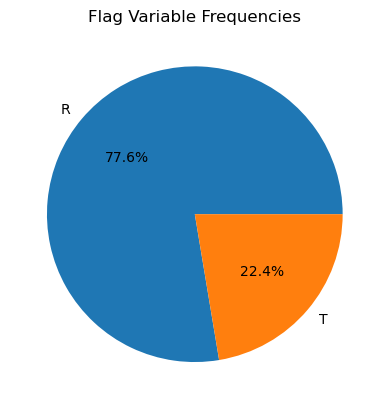

In [28]:
counts = df['Flag'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Flag Variable Frequencies')
plt.show()

In [29]:
cols_to_convert = ['CAN', 'Data1','Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Data8']

# Convert the hex values to numeric values
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.apply(lambda y: int(y, 16)))
# df[cols_to_convert] = df[cols_to_convert].apply(lambda x: float(x))

In [31]:
df.head()

,timeStamp,CAN,noOfData,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Flag
0,1.513926e+09,1087,8,0,64,96,255,101,180,8,0,R
1,1.513926e+09,399,8,254,98,0,0,0,60,0,0,R
2,1.513926e+09,608,8,27,36,36,48,255,143,109,58,R
3,1.513926e+09,672,8,100,0,131,29,22,5,227,0,R
4,1.513926e+09,790,8,69,36,156,9,36,38,0,118,R


Exploratory Data Aanlysis on the Features

Mean of the Features

In [38]:
mean_val = df_features.mean()

In [39]:
mean_val

timeStamp    1.513926e+09
CAN          7.051624e+02
noOfData              inf
Data1        7.948543e+01
Data2        6.487158e+01
Data3        5.600055e+01
Data4        8.057412e+01
Data5        7.799343e+01
Data6        7.938229e+01
Data7        4.613404e+01
Data8        6.579754e+01
dtype: float64

In [44]:
df_features.pop('noOfData')

0         8
1         8
2         8
3         8
4         8
         ..
351267    8
351268    8
351269    8
351270    8
351271    8
Name: noOfData, Length: 334978, dtype: object

Variance of Data in the Features

In [40]:
mean_val = df_features.var()

/var/folders/cm/j8d2nfhd5lvg55861_0341s00000gn/T/ipykernel_62026/3621059236.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_val = df_features.var()


In [41]:
mean_val

timeStamp      1607.504556
CAN          156246.008616
Data1          8470.725708
Data2          4694.718212
Data3          5310.604973
Data4          9056.365572
Data5          7878.049635
Data6          6368.679341
Data7          5346.351187
Data8          6255.313463
dtype: float64

In [86]:
import os
if not os.path.exists('heatmaps'):
    os.makedirs('heatmapsR')
    os.makedirs('heatmapsT')

In [42]:
df_features.pop('timeStamp')

0         1.513926e+09
1         1.513926e+09
2         1.513926e+09
3         1.513926e+09
4         1.513926e+09
              ...     
351267    1.513926e+09
351268    1.513926e+09
351269    1.513926e+09
351270    1.513926e+09
351271    1.513926e+09
Name: timeStamp, Length: 334978, dtype: float64

Normalize the Features values

In [45]:
max_val = df_features.values.max()
min_val = df_features.values.min()
print(max_val)
print(min_val)

1680
0


In [46]:
for i in df_features.index:
    for j in df_features.columns:
        df_features.at[i, j] = (df_features.at[i, j] - min_val)/(max_val - min_val)
df_features.head()

,CAN,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.647024,0.000000,0.038095,0.057143,0.151786,0.060119,0.107143,0.004762,0.000000
1,0.237500,0.151190,0.058333,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000
2,0.361905,0.016071,0.021429,0.021429,0.028571,0.151786,0.085119,0.064881,0.034524
3,0.400000,0.059524,0.000000,0.077976,0.017262,0.013095,0.002976,0.135119,0.000000
4,0.470238,0.041071,0.021429,0.092857,0.005357,0.021429,0.022619,0.000000,0.070238


In [47]:
df_features.to_csv('features.csv')
df_target.to_csv('target.csv')

In [48]:
max_val = df_features.values.max()
min_val = df_features.values.min()
print(max_val)
print(min_val)

1.0
0.0


Conversion of Feature Vecotors into HeatMaps

In [ ]:
for i, row in df_features.iterrows():
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap([row.values], cmap='hot', annot=False, fmt='.2f', cbar=False, xticklabels=False, yticklabels=False, vmin=min_val, vmax=max_val, ax = ax)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.savefig(f'heatmaps{df_target[i]}/heatmap_{i}.png')
    
    plt.close()

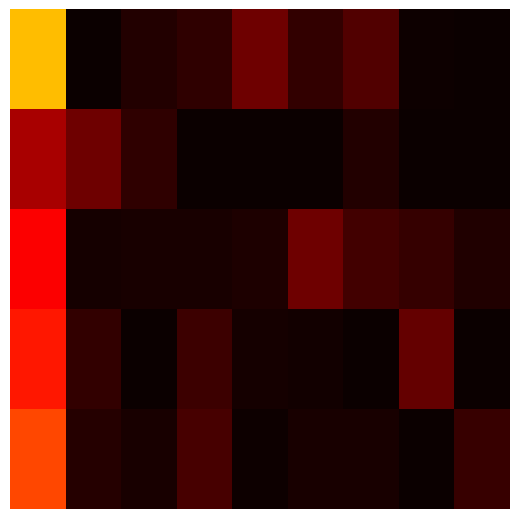

In [103]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_features.head(), cmap='hot', annot=False, fmt='.2f', cbar=False, xticklabels=False, yticklabels=False, vmin=min_val, vmax=max_val, ax = ax)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
# Show the plot
plt.savefig('1.png')
plt.show()
plt.close()